In [1]:
from sklearn.preprocessing import MinMaxScaler

In [2]:
import math

In [3]:
 import pandas_datareader as pdr

C:\Users\DEBARGHA GHOSH\Anaconda3\envs\tensorflow\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [4]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,LSTM

Using TensorFlow backend.


In [5]:
import matplotlib.pyplot as plt

In [6]:
plt.style.use('fivethirtyeight')

In [8]:
df=pdr.DataReader('RELIANCE.NS',data_source='yahoo',start='2012-01-01',end='2019-12-17' )

In [48]:
df[0:5]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-02,354.875000,343.575012,348.399994,353.274994,8598434.0,309.786346
2012-01-03,363.450012,355.174988,356.125000,362.325012,9366982.0,317.722321
2012-01-04,365.475006,356.674988,363.700012,358.075012,8476734.0,313.995514
2012-01-05,362.475006,347.049988,357.500000,349.750000,13239172.0,306.695282
2012-01-06,362.000000,348.325012,348.524994,358.774994,9406294.0,314.609314


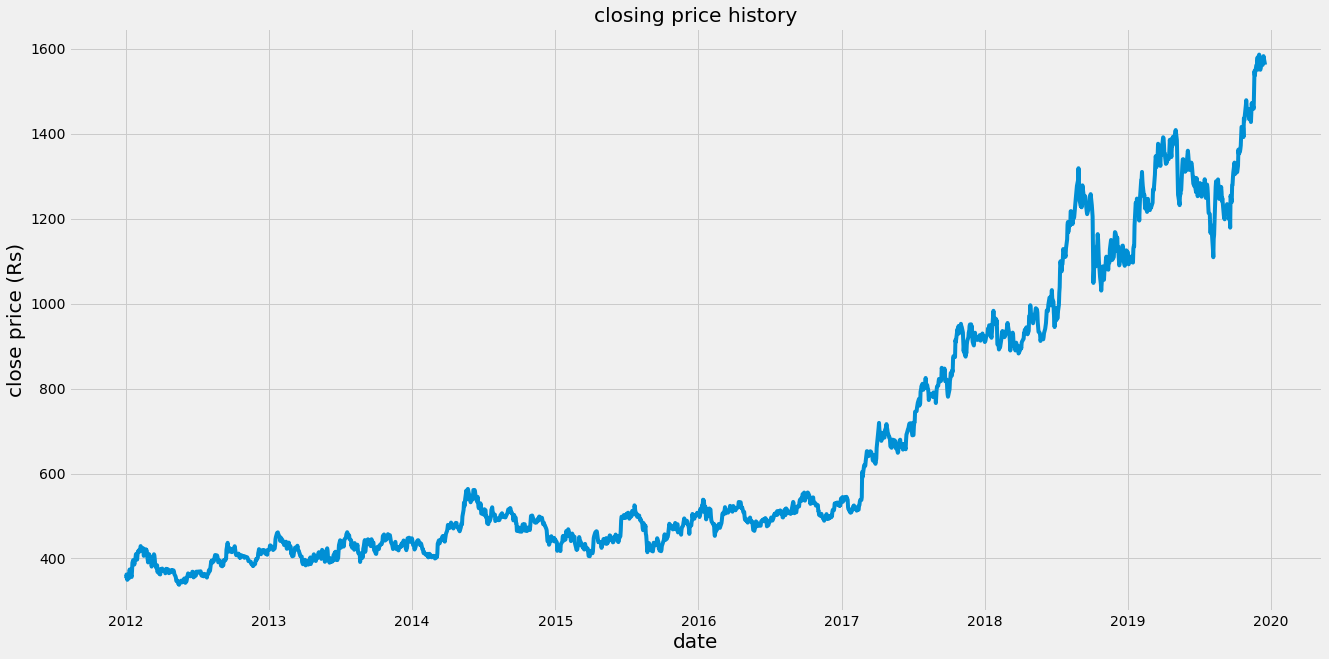

In [10]:
plt.figure(figsize=(20,10))
plt.title('closing price history')
plt.plot(df['Close'])
plt.xlabel('date',fontsize=20)
plt.ylabel('close price (Rs)',fontsize=20)
plt.show()

In [47]:
data=df.filter(['Close'])
dataset=data.values
print(dataset.shape)
training_data_length=math.ceil(len(dataset) * .8)
training_data_length


(1956, 1)


1565

In [44]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data[0:5]

array([[0.01219513],
       [0.01944413],
       [0.01603991],
       [0.00937163],
       [0.01660059]])

In [14]:
train_data=scaled_data[0:training_data_length,:]

In [45]:
len(train_data)

1565

In [16]:
x_train=[]
y_train=[]
for i in range (60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
         

In [39]:
x_train[0]

array([[0.01219513],
       [0.01944413],
       [0.01603991],
       [0.00937163],
       [0.01660059],
       [0.01207498],
       [0.02406986],
       [0.02889584],
       [0.02435021],
       [0.02230767],
       [0.01475831],
       [0.02641276],
       [0.04151148],
       [0.04387442],
       [0.0466779 ],
       [0.03822741],
       [0.04311347],
       [0.04599705],
       [0.05779168],
       [0.04751893],
       [0.05647002],
       [0.06211704],
       [0.06133607],
       [0.06496056],
       [0.06283793],
       [0.06746366],
       [0.07301055],
       [0.07118827],
       [0.06694302],
       [0.069346  ],
       [0.06920583],
       [0.06429975],
       [0.05460773],
       [0.05691058],
       [0.06706316],
       [0.06299814],
       [0.0654812 ],
       [0.05761145],
       [0.04219233],
       [0.0482198 ],
       [0.05793184],
       [0.05400698],
       [0.05526853],
       [0.0486203 ],
       [0.04022989],
       [0.03432256],
       [0.03912852],
       [0.049

In [40]:
y_train[0]

0.01944413006264356

In [19]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [20]:
x_train.shape

(1505, 60)

In [21]:
y_train.shape

(1505,)

In [22]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [24]:
x_train.shape

(1505, 60, 1)

In [25]:
model=Sequential()
model.add(LSTM(100,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(100,return_sequences=False))
model.add(Dense(50))
model.add(Dense(1))

In [30]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [31]:
model.fit(x_train,y_train,batch_size=1,epochs=2)

Epoch 1/2
1505/1505 [==============================] - 376s 250ms/step - loss: 4.4088e-04
Epoch 2/2
1505/1505 [==============================] - 337s 224ms/step - loss: 2.8315e-04


In [32]:
test_data=scaled_data[training_data_length-60:,:]
x_test=[]
y_test=dataset[training_data_length:,:]
len(test_data)

451

In [43]:
test_data.shape
y_test[0]

array([989.25])

In [34]:
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])
    
    

In [35]:
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [36]:
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

In [37]:
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

41.1842307946871

C:\Users\DEBARGHA GHOSH\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


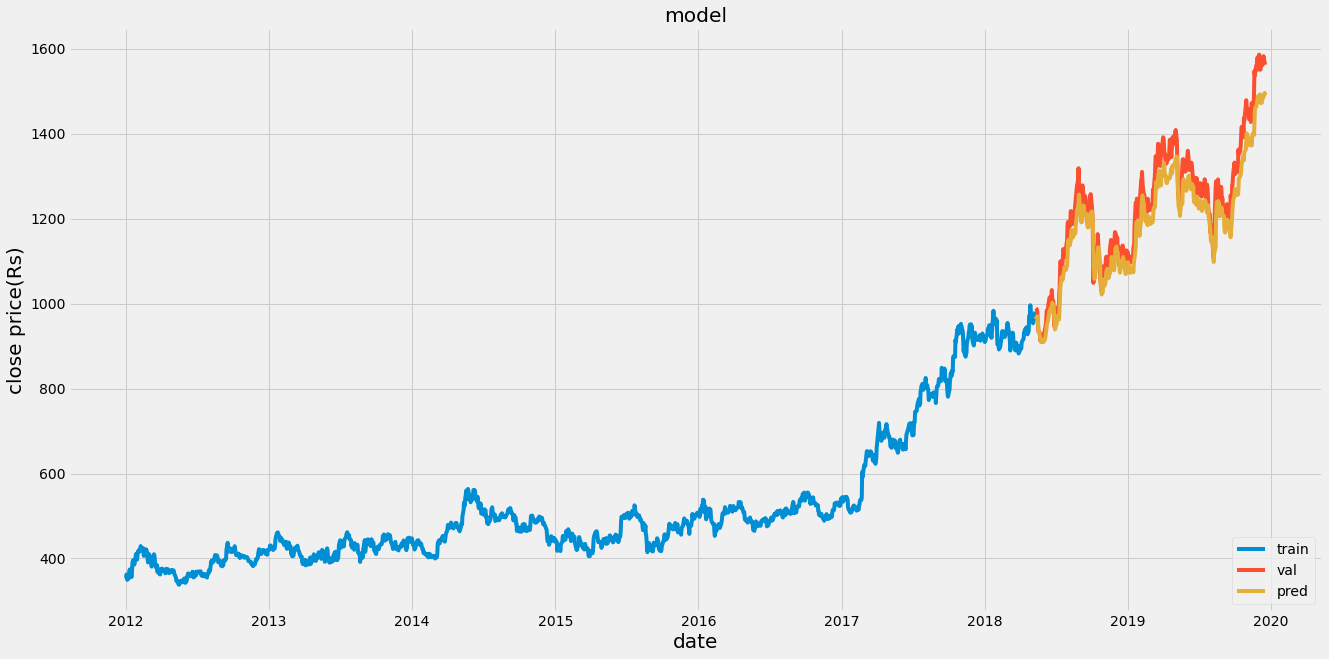

In [38]:
train=data[:training_data_length]
valid=data[training_data_length:]
valid['predictions']=predictions
plt.figure(figsize=(20,10))
plt.title('model')
plt.xlabel('date',fontsize=20)
plt.ylabel('close price(Rs)',fontsize=20)
plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['train','val','pred'] ,loc='lower right')
plt.show()
